W14 - Jevon Ivander K / 0706022310028

### Strategy to Boost Supermarket Sales in January

As the manager of a supermarket in Surabaya, I find myself at a crossroads as we step into new year. The new year has just begun, and I am eager to understand how my supermarket has been performing. My office is filled with stacks of transaction data from our customers, brimming with numbers, percentages, and seemingly endless combinations of products. Yet, I feel lost amidst the overwhelming data.

The challenge is clear: I need **insights on what is truly happening in my supermarket**. What are the purchasing patterns of my customers? Which products are flying off the shelves, and which ones are barely noticed? More importantly, **how can I use this information to optimize the layout of the store and boost sales this year**?

In this year, **the store layout is the first thing I want to focus on**. Customers are navigating through the aisles, but I want to ensure they’re being guided to the right places. I wonder: Should I place complementary products closer together? Should I create specific zones to attract customers? For instance, should shampoos be next to toothpaste or near body soaps? Should snacks and drinks be closer together to encourage impulse buys?

The only thing I have right now is the [raw transaction data](https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/Supermarket-January-2017.xlsx) or you can just use this link https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/Supermarket-January-2017.xlsx. It tells me what customers bought, but I need help deciphering it. **Are there certain product combinations that people frequently buy together?** For example, do people who buy detergents also pick up fabric softeners? Do snacks and beverages have a strong pairing trend?

I need your expertise to dig into this data and uncover patterns. Once we understand what products customers often buy together, I can rearrange the store layout to make it more intuitive and appealing. This way, I can improve the shopping experience for my customers while also increasing the chances of cross-selling and boosting sales.

Let’s uncover the story behind the numbers and make data-driven decisions that will set my supermarket up for success in this new year. Help me turn this chaotic dataset into a clear strategy that drives results!

#### Scoring Rubric (Total 100 points)




1.   Class Attendance: 0 / 10

2.   On-time Submission:  0 / 10

3.   EDA Quality & Visualisations:
*   Correct loading and checking of data: 0 / 5
*   Meaningful descriptive stats: 0 / 5
*   At least 2 clear plots with short interpretations: 0 / 5 / 10

4.   Data Preprocessing & Basket Creation
*   Proper column selection and cleaning decisions explained: 0 / 10
*   Correct aggregation to transaction level and one-hot encoding: 0 / 10

5.   ARM Implementation (Apriori Rules)
*   Correct use of apriori() with appropriate min_support values: 0 / 10
*   Correct use of association_rules() with appropriate filtering: 0 / 10

6.   Insights & Business Recommendations
*   Interpretation of rules: 0 / 10
*   Realistic managerial actions:  0 / 10

In [40]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
import warnings
warnings.filterwarnings(
    "ignore",
    category=DeprecationWarning,
    module="jupyter_client.session"
)

!pip install mlxtend==0.23.1

# EDA Quality & Visualisations

In [41]:
df = pd.read_excel("https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/Supermarket-January-2017.xlsx")
df.head()

,KD_SBR,TP_TRN,KDSUP,KAS,TRN_DK,GDG,GGD,KDSLS,KEL,ITEM,NAMA,BIN,KDBIN,TGL_TRANS,NO_BKT,NO_ORD,STS_BYR,SLD_AK,SLD_AKG,QTY,HRG_OLD,HRGBL_OLD,HRG_PKK,HRG_JUL,DISC,DISC1,DISC2,JLH_DIS,JLH_DIS1,JLH_DIS2,HRGJL_OLD,HRGJL1_OLD,HRGJL2_OLD,SUPP_OLD,DISB1_OLD,DISB2_OLD,PPN,PPN_OLD,PPNBM,PPNBM_OLD,JLH_TRANS,KET_TRANS,PTS_GDG,PTS_KEL,PTS_ITEM,QTY_PTS,TRNBL,POST,TGL_OLD,FILLER,SUPPLIER,DEP_SWA,GON,KONS,POST_STOK,STATUS,TP_ADJ,USER,TANGGAL,JAM,LAMA_CRD
0,IN,JUL,NaN,6.0,K,A,AREA,NaN,KERTAS,39390.0,KERTAS KADO SINAR DU,NaN,NaN,2017-01-02,060102001,NaN,CD,NaN,NaN,2.0,1100.0,NaN,549.98,1100.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,2200.0,CASH DISCOUNT,NaN,NaN,NaN,NaN,N,NaN,NaT,1.701022e+11,NaN,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:12:02,NaN
1,IN,JUL,NaN,6.0,K,A,AREA,NaN,BTL/DOT,13108.0,PIGEON BTL PP RP 240,NaN,NaN,2017-01-02,060102002,NaN,CD,NaN,NaN,1.0,23000.0,NaN,20640.45,23000.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,23000.0,CASH DISCOUNT,NaN,NaN,NaN,NaN,N,NaN,NaT,1.701029e+11,NaN,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:24:51,NaN
2,IN,JUL,NaN,6.0,K,A,AREA,NaN,MUSTIKA,5644.0,MR SEKAR TANJUNG KB,13.0,NaN,2017-01-02,060102003,NaN,CD,NaN,NaN,1.0,9500.0,NaN,8720.00,9500.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,9500.0,CASH DISCOUNT,NaN,NaN,NaN,NaN,N,NaN,NaT,1.701030e+11,NaN,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:28:18,NaN
3,IN,JUL,NaN,6.0,K,A,AREA,NaN,SABUN.C,7273.0,BIORE BF 100ML WHITE,NaN,NaN,2017-01-02,060102003,NaN,CD,NaN,NaN,1.0,6900.0,NaN,6215.00,6900.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,6900.0,CASH DISCOUNT,NaN,NaN,NaN,NaN,N,NaN,NaT,1.701020e+11,NaN,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:28:22,NaN
4,IN,JUL,NaN,6.0,K,A,AREA,NaN,LULURMD,12168.0,OVALE LULUR BALI BEN,NaN,NaN,2017-01-02,060102003,NaN,CD,NaN,NaN,1.0,13500.0,NaN,12119.65,13500.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,13500.0,CASH DISCOUNT,NaN,NaN,NaN,NaN,N,NaN,NaT,1.701020e+11,NaN,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:28:20,NaN


In [42]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148489 entries, 0 to 148488
Data columns (total 61 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   KD_SBR      148486 non-null  object        
 1   TP_TRN      148486 non-null  object        
 2   KDSUP       40832 non-null   float64       
 3   KAS         136294 non-null  float64       
 4   TRN_DK      148486 non-null  object        
 5   GDG         148486 non-null  object        
 6   GGD         148486 non-null  object        
 7   KDSLS       0 non-null       float64       
 8   KEL         148486 non-null  object        
 9   ITEM        148486 non-null  float64       
 10  NAMA        148486 non-null  object        
 11  BIN         13586 non-null   float64       
 12  KDBIN       0 non-null       float64       
 13  TGL_TRANS   148486 non-null  datetime64[ns]
 14  NO_BKT      148486 non-null  object        
 15  NO_ORD      0 non-null       float64       
 16  ST

This dataset has 148486 rows and 61 columns, with a mix of fully complete transactional fields such as item details, quantities, prices, dates, and user information, while many other fields appear to be legacy or optional and contain very few or even zero values. Only a portion of the columns provide consistently usable data, and the rest mostly add noise because they are not filled for most transactions. Overall, the dataset is still workable, but it contains many columns that do not contribute meaningful information.

In [43]:
# check missing values
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# check missing values
df.isnull().sum()

,0
KD_SBR,3
TP_TRN,3
KDSUP,107657
KAS,12195
TRN_DK,3
GDG,3
GGD,3
KDSLS,148489
KEL,3
ITEM,3


In [44]:
# check percentage of missing values per column
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

missing_percentage = df.isnull().sum() / len(df) * 100
missing_percentage = missing_percentage.sort_values(ascending=False)
display(missing_percentage[missing_percentage > 0])

,0
KDSLS,100.000000
KDBIN,100.000000
JLH_DIS1,100.000000
JLH_DIS,100.000000
NO_ORD,100.000000
PTS_KEL,100.000000
PTS_ITEM,100.000000
PTS_GDG,100.000000
QTY_PTS,100.000000
JLH_DIS2,100.000000


This missing value analysis shows that a large portion of the columns in the dataset have extremely high levels of emptiness, with more than 20 columns completely empty such as KDSLS, KDBIN, NO_ORD, JLH_DIS, and several PTS fields, meaning they contain no usable information at all. Many other fields also have over 90 percent missing values, including BIN, SLD_AK, SLD_AKG, DISC1, DISC2, SUPPLIER, POST, TGL_OLD, and various “OLD” pricing and tax columns, suggesting they are either legacy fields or only relevant for a very small subset of transactions. In contrast, core transaction fields like ITEM, QTY, TGL_TRANS, HRG_PKK, HRG_JUL, and other key identifiers have almost no missing values and can be safely used for analysis. Overall, this confirms that the dataset contains many unused or sparsely filled columns, and the next step should focus on simplifying the dataset by removing columns that are empty or have excessively high missing percentages.

In [45]:
df.describe()

,KDSUP,KAS,KDSLS,ITEM,BIN,KDBIN,TGL_TRANS,NO_ORD,SLD_AK,SLD_AKG,QTY,HRG_OLD,HRGBL_OLD,HRG_PKK,HRG_JUL,DISC,DISC1,DISC2,JLH_DIS,JLH_DIS1,JLH_DIS2,HRGJL_OLD,HRGJL1_OLD,HRGJL2_OLD,SUPP_OLD,DISB1_OLD,DISB2_OLD,PPN,PPN_OLD,PPNBM,PPNBM_OLD,JLH_TRANS,PTS_GDG,PTS_KEL,PTS_ITEM,QTY_PTS,TGL_OLD,FILLER,SUPPLIER,DEP_SWA,TANGGAL,LAMA_CRD
count,40832.000000,136294.000000,0.0,148486.000000,13586.000000,0.0,148486,0.0,11769.000000,9350.000000,148486.000000,145702.000000,9350.000000,148486.000000,148486.000000,146957.000000,14695.000000,10753.000000,0.0,0.0,0.0,10879.000000,9350.000000,9350.000000,9350.000000,9350.000000,9350.000000,146600.000000,9350.000000,9350.000000,9350.000000,1.484860e+05,0.0,0.0,0.0,0.0,8847,1.484860e+05,7264.000000,1668.000000,148486,37.0
mean,650.873384,4.497381,NaN,21322.181445,8.858531,NaN,2017-01-15 21:02:24.159045376,NaN,20.819228,15.819209,3.163174,21828.817133,20286.487016,19901.017212,21795.990560,0.437617,2.995218,0.402527,NaN,NaN,NaN,22094.795018,1.848663,395.584588,387.137540,3.703390,0.339132,0.334158,3.749733,0.000160,0.001176,6.137361e+04,NaN,NaN,NaN,NaN,2016-12-07 05:29:26.429297920,1.717615e+11,313.185573,1.182854,2017-01-15 21:34:32.486295296,0.0
min,0.000000,1.000000,NaN,1.000000,1.000000,NaN,2017-01-01 00:00:00,NaN,-12.000000,-12.000000,1.000000,250.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,NaN,NaN,NaN,NaN,2013-09-24 00:00:00,1.701010e+11,0.000000,1.000000,2017-01-01 00:00:00,0.0
25%,30.000000,3.000000,NaN,5221.000000,6.000000,NaN,2017-01-07 00:00:00,NaN,0.000000,0.000000,1.000000,4500.000000,4500.000000,3728.920000,4425.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,5000.000000,0.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.800000e+03,NaN,NaN,NaN,NaN,2016-12-01 00:00:00,1.701077e+11,8.000000,1.000000,2017-01-07 00:00:00,0.0
50%,999.000000,5.000000,NaN,13839.000000,8.000000,NaN,2017-01-15 00:00:00,NaN,3.000000,2.000000,1.000000,9700.000000,10302.000000,8365.180000,9600.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,11000.000000,0.000000,0.000000,184.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.270000e+04,NaN,NaN,NaN,NaN,2016-12-22 00:00:00,1.701160e+11,69.000000,1.000000,2017-01-16 00:00:00,0.0
75%,999.000000,6.000000,NaN,35802.750000,13.000000,NaN,2017-01-25 00:00:00,NaN,13.000000,11.000000,2.000000,20250.000000,19786.940000,17769.380000,20200.000000,0.000000,3.000000,0.000000,NaN,NaN,NaN,23000.000000,0.000000,0.000000,603.000000,4.000000,0.000000,0.000000,10.000000,0.000000,0.000000,3.060000e+04,NaN,NaN,NaN,NaN,2017-01-05 00:00:00,1.701251e+11,444.000000,1.000000,2017-01-25 00:00:00,0.0
max,1769.000000,15.000000,NaN,700047.000000,19.000000,NaN,2017-01-31 00:00:00,NaN,2663.000000,1748.000000,2000.000000,700000.000000,517273.000000,720000.000000,900000.000000,50.000000,50.000000,31.400000,NaN,NaN,NaN,536900.000000,6250.000000,120600.000000,1769.000000,40.000000,31.400000,10.000000,10.000000,0.100000,9.000000,3.778570e+07,NaN,NaN,NaN,NaN,2017-01-31 00:00:00,7.013157e+11,1769.000000,2.000000,2017-02-01 00:00:00,0.0
std,467.837803,1.906136,NaN,25881.022963,4.537190,NaN,NaN,NaN,70.033381,54.576439,16.266576,40163.889928,34874.831844,38566.965857,40289.934102,2.475039,5.732793,1.739868,NaN,NaN,NaN,36368.941118,103.933377,2753.395563,471.396592,6.200473,1.727602,1.631778,4.841419,0.004002,0.095344,3.981378e+05,NaN,NaN,NaN,NaN,NaN,2.951083e+10,463.993685,0.386662,NaN,0.0


This shows that several key numeric columns in your dataset have very different levels of completeness and distribution. Columns like ITEM, QTY, HRG_OLD, HRG_PKK, HRG_JUL, and DISC are fully or almost fully populated and display wide value ranges, indicating large variation in item codes, quantities, and pricing. In contrast, fields such as KDSUP, BIN, SLD_AK, SLD_AKG, DISC1, and DISC2 have much lower counts, meaning they apply only to certain transactions. Several columns include only nulls, such as KDSLS, KDBIN, NO_ORD, and all JLH_DIS fields, making them irrelevant for analysis. Numeric distributions show skewed patterns with high maximum values and large standard deviations, suggesting the presence of outliers or diverse product types. Overall, the table indicates which features are strong and which are too incomplete to be useful, and the next step will be to drop the columns with zero or very low counts.

In [46]:
import seaborn as sns

/tmp/ipython-input-2759946569.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')


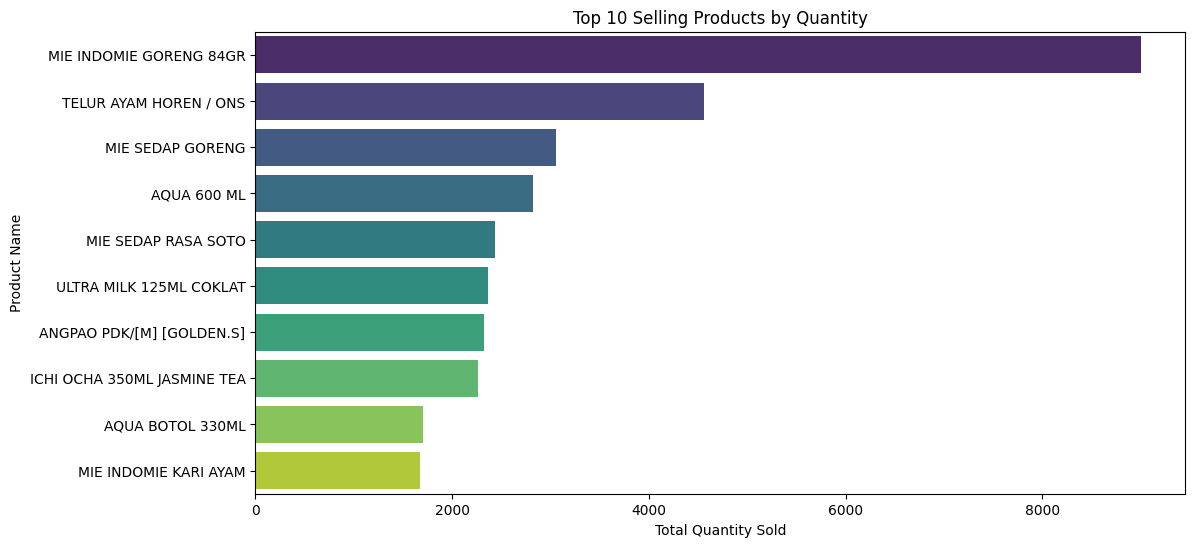

In [47]:
# Plot 1: Top 10 Selling Products by Quantity
top_products = df.groupby('NAMA')['QTY'].sum().nlargest(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.title('Top 10 Selling Products by Quantity')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Name')
plt.show()

This chart shows the top ten best-selling products based on total quantity sold, highlighting a strong dominance of instant noodles and staple everyday items. “MIE INDOMIE GORENG 84GR” is by far the highest seller, significantly outperforming all other products, followed by fresh “TELUR AYAM” and another instant noodle variant, “MIE SEDAP GORENG.” Beverages like AQUA 600 ML, AQUA 330 ML, and ICHI OCHA 350ML also appear among the top performers, indicating high demand for affordable, fast-moving consumer goods. The presence of ULTRA MILK and ANGPAO products further suggests consistent purchasing behavior across both food and beverage categories. Overall, the chart reflects a market dominated by essential and quick-consumption items.

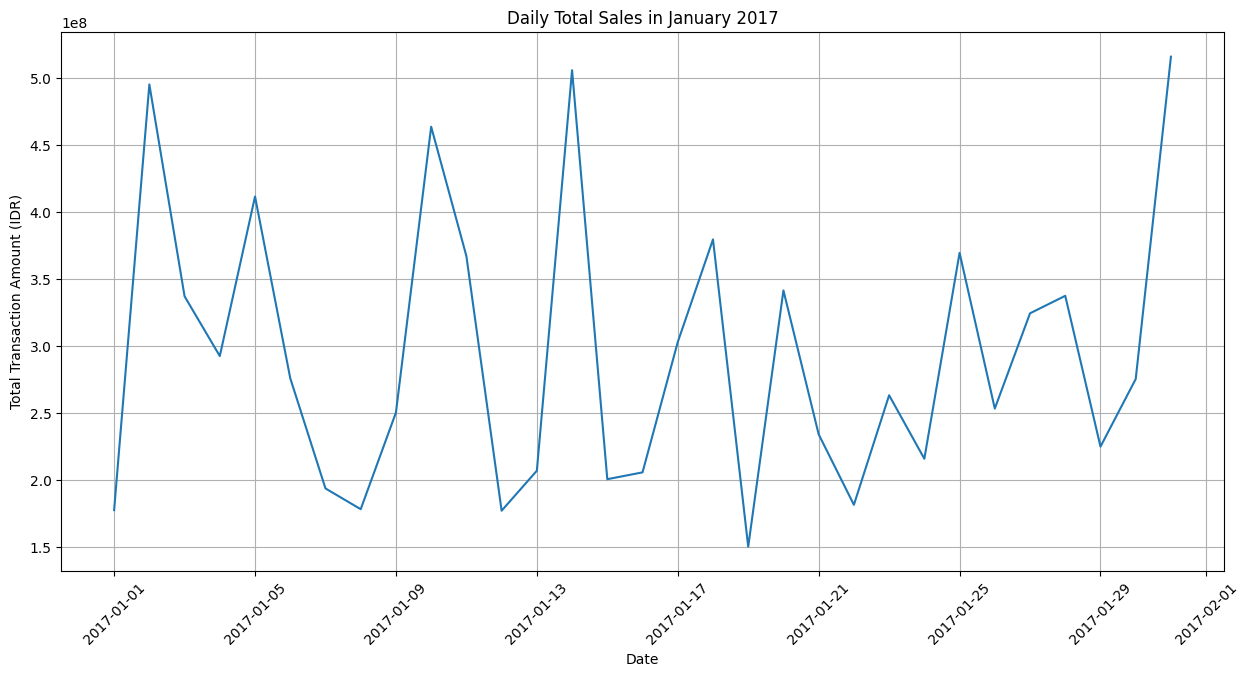

In [48]:
# Plot 2: Daily Sales Trend (Total Transaction Amount)
df['TGL_TRANS_DATE'] = df['TGL_TRANS'].dt.date
daily_sales = df.groupby('TGL_TRANS_DATE')['JLH_TRANS'].sum().reset_index()

plt.figure(figsize=(15, 7))
sns.lineplot(x='TGL_TRANS_DATE', y='JLH_TRANS', data=daily_sales)
plt.title('Daily Total Sales in January 2017')
plt.xlabel('Date')
plt.ylabel('Total Transaction Amount (IDR)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

This line chart illustrates the daily total transaction amounts for January 2017, revealing a highly fluctuating sales pattern throughout the month. Several sharp peaks appear, especially at the beginning, middle, and end of the month, indicating days with unusually high transaction volumes, while other days show noticeable dips, suggesting slower sales periods. The repeated rise-and-fall pattern may reflect weekly shopping cycles, promotional events, or restocking behaviors typical in retail environments. Notably, the month ends with one of the highest spikes, which could be tied to payday effects or end-of-month purchasing. Overall, the chart suggests that sales activity is dynamic and influenced by recurring weekly or behavioral factors rather than remaining stable day to day.

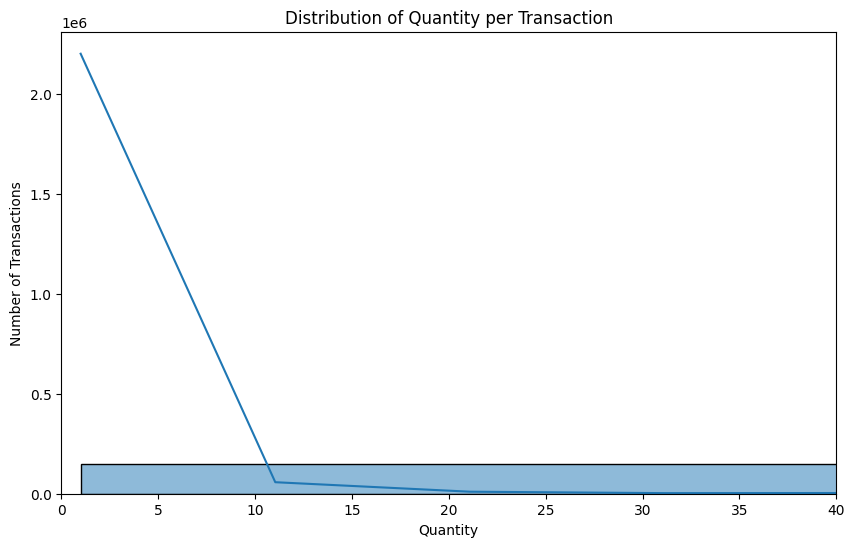

In [49]:
# Plot 3: Distribution of Quantity per Transaction
plt.figure(figsize=(10, 6))
sns.histplot(df['QTY'], bins=30, kde=True)
plt.title('Distribution of Quantity per Transaction')
plt.xlabel('Quantity')
plt.ylabel('Number of Transactions')
plt.xlim(0, df['QTY'].quantile(0.99)) # Limit x-axis to better visualize common quantities
plt.show()

This histogram shows that most transactions involve relatively small quantities, with the distribution heavily concentrated near the lower end of the scale. The sharp peak at low quantities indicates that customers typically purchase only a few units per transaction, while higher quantities become increasingly rare. Overall, the distribution is highly right-skewed, suggesting that bulk purchases are uncommon and the majority of sales consist of small, frequent item quantities.

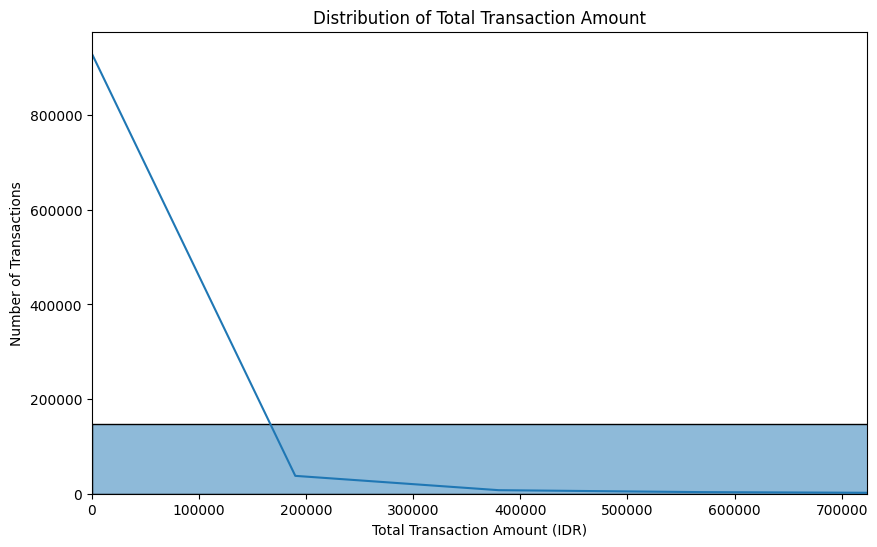

In [50]:
# Plot 4: Distribution of Total Transaction Amount
# Filter out extremely high values that might skew the plot for better visualization of common ranges
plt.figure(figsize=(10, 6))
sns.histplot(df['JLH_TRANS'], bins=50, kde=True)
plt.title('Distribution of Total Transaction Amount')
plt.xlabel('Total Transaction Amount (IDR)')
plt.ylabel('Number of Transactions')
plt.xlim(0, df['JLH_TRANS'].quantile(0.99)) # Limit x-axis to better visualize common amounts
plt.show()

This histogram of total transaction amounts shows that most transactions fall within the lower price ranges, with a steep concentration near the left side of the plot. After capping the x-axis at the 99th percentile to improve visibility, it becomes clear that typical transaction values cluster tightly around smaller amounts, while higher-value transactions occur far less frequently. The sharp right-skew indicates that although a few transactions involve significantly larger totals, the majority of sales consist of relatively modest purchase values. This pattern is consistent with high-volume retail environments where customers commonly buy a small number of low-cost items.

# Data Preprocessing & Basket Creation

In [51]:
# Create a new DataFrame with only 'NO_BKT' and 'KEL' columns
df_transactions = df[['NO_BKT', 'KEL']].copy()

This new dataframe keeps only NO_BKT (transaction ID) and KEL (product category) because these are the essential columns needed to understand which categories of products are frequently purchased together in Market Basket Analysis and Association Rule Mining such as the Apriori algorithm. Instead of analyzing individual product names, focusing on categories allows us to identify broader purchasing patterns and understand how customers combine different types of items during a shopping trip. All other fields like prices, dates, discounts, or quantities are unnecessary for this stage of the analysis.

In [52]:
# Verify nulls in the selected columns
print("Missing values in new DataFrame before dropping nulls:")
display(df_transactions.isnull().sum())

Missing values in new DataFrame before dropping nulls:


,0
NO_BKT,3
KEL,3


By removing rows where NO_BKT or KEL is missing, we ensure that every record represents a valid product category within a valid transaction, producing cleaner and more reliable input for generating meaningful association rules.

In [53]:
# Drop rows where either 'NO_BKT' or 'KEL' is null
df_transactions.dropna(subset=['NO_BKT', 'KEL'], inplace=True)

# Display the first few rows of the new DataFrame
display(df_transactions.head())

,NO_BKT,KEL
0,060102001,KERTAS
1,060102002,BTL/DOT
2,060102003,MUSTIKA
3,060102003,SABUN.C
4,060102003,LULURMD


In [54]:
# Verify that there are no more nulls in the selected columns
print("Missing values in new DataFrame after dropping nulls:")
display(df_transactions.isnull().sum())

Missing values in new DataFrame after dropping nulls:


,0
NO_BKT,0
KEL,0


In [55]:
basket = df.groupby(['NO_BKT', 'KEL'])['KEL'].count().unstack().fillna(0)
display(basket.head())

KEL,A BABY,A JAHIT,A TULIS,A.AGAR,A.DAPUR,ABON,ACNES,AGENDA,AIR.M,AKANTOR,ALATPEL,ALBUM,AMPLOP,ASBAK,ASESORS,ASHOLAT,ASTOR,ATTACK,B DAPUR,B KUE,B POKOK,B.DWS,BABY HP,BAMBI,BANTAL,BATERAI,BEDAKBY,BELIA,BERAS,BGAMBAR,BIORE,BISC BY,BISCKLG,BISCPAK,BOLPOIN,BONEKA,BTL/DOT,BUBURBY,BUKU,BUMBU,C.MANIA,CALCULT,CAMILAN,CAMPINA,CANGKIR,CD.ANAK,CELANA,CELENGN,CETAKAN,COKLAT,COLOGBY,COLOGNE,COTTONB,CUSSONS,DDORANT,DETERJN,DEVA,ELEKTRO,ESKAN,ESSENSE,FANBO,FIESTA,GARAM,GAS,GATSBY,GAYUNG,GERY,GOODTIM,GT MINI,GUCI,GULA,GUNTING,H.TONIC,HAIR SP,HANDUK,HANGER,HBL,HUKI,IKAT.P,INEZ,INSECTA,J.HUJAN,JAM,JOHNSON,K.KAKI,KACANG,KAIN,KAMPER,KAPAS,KARDUS,KARET,KARTU,KC MATA,KECAP,KEJU,KERTAS,KERUPUK,KESET,KIPAS,KONDOM,KOPI,KOSMETC,KOTAK.S,KUE,KUEPIA,LAMPU,LATULIP,LAURIER,LILIN,LULURMD,M.ANGIN,M.GOSOK,M.HEWAN,M.KOTAK,M.RAMBT,MADU,MAINAN,MAKANAN,MANGKOK,MANISAN,MARGARN,MARINA,MCEREAL,MIE,MINUMAN,MINYAK,MISSIS,MKALENG,MOIST,MUSTIKA,N.COMPU,NAMPAN,NIVEA,NYAM MO,NYAM2,O.KUMUR,OBAT,OBATPEL,P GIGI,P.BOTOL,P.DALAM,P.RUMAH,P.WAJAH,PAKAIAN,PAMPERS,PARCEL,PARFUME,PAYUNG,PEHARUM,PELICIN,PEMBERS,PEMUTIH,PENGHRM,PENSIL,PEREKAT,PERMEN,PH M,PIGEON,PIRING,PIXY,PLASTIK,PMBALUT,PNLINER,POND'S,PSCUKUR,PUTERI,RAMROSE,RED.A,ROKOK,ROTI.B,SABUN.C,SABUN.M,SABUN.T,SABUNCP,SABUNKS,SABUNMK,SAMBAL,SANDAL,SAPU,SARIAYU,SARUNGT,SAUS,SEBAMED,SELAI,SEMIR.R,SEMIR.S,SENDOK,SEPATU,SERBET,SETRIKA,SHAMPOO,SHAPES,SIKAT,SIKAT G,SINGLET,SIRUP,SISIR,SKIPPY,SNACK,SO GOOD,SOFTENR,SOKLIN,SOSIS,SPIDOL,STANGAN,SUKANDA,SUP,SUSU,SUSU KL,SUSU KM,SUSU KT,SYLVERY,TALC,TAS,TEH,TELUR,TEMPATT,TEPAK,TEPUNG,THERMOS,TIGA R,TIM WFR,TIMBA,TIMTAM,TIPE-X,TISSU B,TISSUE,TOPI,TOPLES,TPENSIL,TS HILO,TS LOWF,TS SWET,TUSUK G,TUTUP,VAPE,VIVA,WAFER,WAFER.P,WAFERKL,WALLS,WARDAH,WONDERL,WRP,WRP LW,ZWITSAL
NO_BKT,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0001/0117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0002/0117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0003/0117,0.0,0.0,0.0,0

In [56]:
# Convert quantities to 1 and 0

basket_encoded = basket.applymap(lambda x: 1 if x > 0 else 0)
display(basket_encoded.head())

/tmp/ipython-input-824046202.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_encoded = basket.applymap(lambda x: 1 if x > 0 else 0)


KEL,A BABY,A JAHIT,A TULIS,A.AGAR,A.DAPUR,ABON,ACNES,AGENDA,AIR.M,AKANTOR,ALATPEL,ALBUM,AMPLOP,ASBAK,ASESORS,ASHOLAT,ASTOR,ATTACK,B DAPUR,B KUE,B POKOK,B.DWS,BABY HP,BAMBI,BANTAL,BATERAI,BEDAKBY,BELIA,BERAS,BGAMBAR,BIORE,BISC BY,BISCKLG,BISCPAK,BOLPOIN,BONEKA,BTL/DOT,BUBURBY,BUKU,BUMBU,C.MANIA,CALCULT,CAMILAN,CAMPINA,CANGKIR,CD.ANAK,CELANA,CELENGN,CETAKAN,COKLAT,COLOGBY,COLOGNE,COTTONB,CUSSONS,DDORANT,DETERJN,DEVA,ELEKTRO,ESKAN,ESSENSE,FANBO,FIESTA,GARAM,GAS,GATSBY,GAYUNG,GERY,GOODTIM,GT MINI,GUCI,GULA,GUNTING,H.TONIC,HAIR SP,HANDUK,HANGER,HBL,HUKI,IKAT.P,INEZ,INSECTA,J.HUJAN,JAM,JOHNSON,K.KAKI,KACANG,KAIN,KAMPER,KAPAS,KARDUS,KARET,KARTU,KC MATA,KECAP,KEJU,KERTAS,KERUPUK,KESET,KIPAS,KONDOM,KOPI,KOSMETC,KOTAK.S,KUE,KUEPIA,LAMPU,LATULIP,LAURIER,LILIN,LULURMD,M.ANGIN,M.GOSOK,M.HEWAN,M.KOTAK,M.RAMBT,MADU,MAINAN,MAKANAN,MANGKOK,MANISAN,MARGARN,MARINA,MCEREAL,MIE,MINUMAN,MINYAK,MISSIS,MKALENG,MOIST,MUSTIKA,N.COMPU,NAMPAN,NIVEA,NYAM MO,NYAM2,O.KUMUR,OBAT,OBATPEL,P GIGI,P.BOTOL,P.DALAM,P.RUMAH,P.WAJAH,PAKAIAN,PAMPERS,PARCEL,PARFUME,PAYUNG,PEHARUM,PELICIN,PEMBERS,PEMUTIH,PENGHRM,PENSIL,PEREKAT,PERMEN,PH M,PIGEON,PIRING,PIXY,PLASTIK,PMBALUT,PNLINER,POND'S,PSCUKUR,PUTERI,RAMROSE,RED.A,ROKOK,ROTI.B,SABUN.C,SABUN.M,SABUN.T,SABUNCP,SABUNKS,SABUNMK,SAMBAL,SANDAL,SAPU,SARIAYU,SARUNGT,SAUS,SEBAMED,SELAI,SEMIR.R,SEMIR.S,SENDOK,SEPATU,SERBET,SETRIKA,SHAMPOO,SHAPES,SIKAT,SIKAT G,SINGLET,SIRUP,SISIR,SKIPPY,SNACK,SO GOOD,SOFTENR,SOKLIN,SOSIS,SPIDOL,STANGAN,SUKANDA,SUP,SUSU,SUSU KL,SUSU KM,SUSU KT,SYLVERY,TALC,TAS,TEH,TELUR,TEMPATT,TEPAK,TEPUNG,THERMOS,TIGA R,TIM WFR,TIMBA,TIMTAM,TIPE-X,TISSU B,TISSUE,TOPI,TOPLES,TPENSIL,TS HILO,TS LOWF,TS SWET,TUSUK G,TUTUP,VAPE,VIVA,WAFER,WAFER.P,WAFERKL,WALLS,WARDAH,WONDERL,WRP,WRP LW,ZWITSAL
NO_BKT,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0001/0117,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0002/0117,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0003/0117,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0004/0117,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
000

The process of 'Correct aggregation to transaction level and one-hot encoding' involved two key steps: first, the raw transaction data was aggregated by `NO_BKT` (transaction ID) and `KEL` (product category) to create a 'basket' format, where each row represents a unique transaction and each column represents a product category. This aggregation, combined with `unstack().fillna(0)`, effectively pivoted the data, showing the presence or count of each product within a transaction. Second, this aggregated data underwent one-hot encoding, converting any count greater than zero for a product category in a transaction to '1' (indicating presence) and zero to '0' (indicating absence), thereby transforming the dataset into a binary matrix perfectly suited for association rule mining algorithms like Apriori.

# ARM Implementation (Apriori Rules)

In [57]:
from mlxtend.frequent_patterns import apriori, association_rules
df_apriori = apriori(basket_encoded, min_support = 0.02, use_colnames = True)
df_apriori

/usr/local/lib/python3.12/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.037991,(AIR.M)
1,0.032251,(ASESORS)
2,0.033590,(B DAPUR)
3,0.063600,(BISCPAK)
4,0.024106,(BTL/DOT)
5,0.032360,(COKLAT)
6,0.026593,(DDORANT)
7,0.083607,(DETERJN)
8,0.028507,(GULA)
9,0.021373,(HBL)


in at least 2% of all transactions. This threshold is chosen because it balances two important goals in Market Basket Analysis: ensuring that the resulting patterns are meaningful and relevant while avoiding an overwhelming number of rules from very rare combinations. If the min_support were too low (for example 0.001), the algorithm would generate many insignificant or noise-driven itemsets that do not reflect typical customer behavior. On the other hand, if the min_support were too high (such as 0.10), we might lose valuable insights because only very common patterns would survive. By setting the threshold at 2%, we capture item combinations that occur frequently enough to matter in daily operations, yet still allow the discovery of useful cross-selling opportunities that may not be extremely common but still important for store layout and marketing decisions.

In [64]:
from mlxtend.frequent_patterns import association_rules
import numpy as np

# You already have:
# df_apriori = apriori(basket_encoded, min_support=0.02, use_colnames=True)

# 1. Generate association rules (as you described)
rules = association_rules(
    df_apriori,
    metric="lift",
    min_threshold=1
)

# 2. Compute extra metrics to match your table
supA = rules["antecedent support"]
supB = rules["consequent support"]
supAB = rules["support"]
conf = rules["confidence"]

# Representativity (if you want it all = 1.0 like in your example, keep line below)
rules["representativity"] = 1.0
# If you prefer a formula, you could use: rules["representativity"] = supAB / supA

# Jaccard index
rules["jaccard"] = supAB / (supA + supB - supAB)

# Kulczynski
rules["kulczynski"] = 0.5 * (conf + supAB / supB)

# Certainty factor
rules["certainty"] = (conf - supB) / (1 - supB)

# Zhang's metric
rules["zhangs_metric"] = (conf - supB) / (
    np.maximum(conf, supB) - conf * supB
)

# 3. Reorder columns EXACTLY as you specified
df_association_rules = rules[
    [
        "antecedents",
        "consequents",
        "antecedent support",
        "consequent support",
        "support",
        "confidence",
        "lift",
        "representativity",
        "leverage",
        "conviction",
        "zhangs_metric",
        "jaccard",
        "certainty",
        "kulczynski",
    ]
].reset_index(drop=True)

df_association_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(BISCPAK),(SNACK),0.063600,0.068984,0.021974,0.345509,5.008515,1.0,0.017587,1.422504,0.859642,0.198666,0.297014,0.332026
1,(SNACK),(BISCPAK),0.068984,0.063600,0.021974,0.318542,5.008515,1.0,0.017587,1.374112,0.854699,0.198666,0.272258,0.332026
2,(MIE),(DETERJN),0.078878,0.083607,0.023259,0.294872,3.526894,1.0,0.016664,1.299612,0.781831,0.167059,0.230540,0.286534
3,(DETERJN),(MIE),0.083607,0.078878,0.023259,0.278195,3.526894,1.0,0.016664,1.276137,0.777817,0.167059,0.216385,0.286534
4,(SOFTENR),(DETERJN),0.042883,0.083607,0.027605,0.643722,7.699413,1.0,0.024019,2.572131,0.949505,0.279160,0.611217,0.486948
5,(DETERJN),(SOFTENR),0.083607,0.042883,0.027605,0.330173,7.699413,1.0,0.024019,1.428902,0.909105,0.279160,0.300162,0.486948
6,(DETERJN),(SUSU KT),0.083607,0.166503,0.023997,0.287022,1.723828,1.0,0.010076,1.169036,0.503776,0.106128,0.144595,0.215573
7,(SUSU KT),(DETERJN),0.166503,0.083607,0.023997,0.144123,1.723828,1.0,0.010076,1.070707,0.458205,0.106128,0.066038,0.215573
8,(PAMPERS),(P GIGI),0.139718,0.076227,0.020608,0.147496,1.934954,1.0,0.009958,1.083600,0.523064,0.105499,0.077150,0.208922
9,(P GIGI),(PAMPERS),0.076227,0.139718,0.020608,0.270348,1.934954,1.0,0.009958,1.179030,0.561667,0.105499,0.151845,0.208922


Using **`metric="lift"`** tells the algorithm to evaluate and filter the associations based on the *lift* value, which measures how much more often two items occur together than would be expected if they were independent. Lift is one of the most important metrics in Market Basket Analysis because it directly reflects the *strength* and *usefulness* of a rule. A lift value of **1** means the items are purchased together purely by chance, while a lift **greater than 1** indicates a meaningful positive association. Therefore, setting **`min_threshold=1`** ensures that only rules with lift values **equal to or greater than 1** are kept, automatically removing rules that do not provide real insight or have no practical value for layout planning or cross-selling strategies. This filtering step ensures the resulting rules are both statistically relevant and actionable, focusing only on product relationships that actually matter to your supermarket decision-making.


# Insights & Business Recommendations

# **Interpretation of Rules**

The association rules reveal several strong and meaningful relationships among household categories such as **Detergent (DETERJN)**, **Fabric Softener (SOFTENR)**, **Shampoo**, **Soap (SABUN.M)**, **Toothpaste (P GIGI)**, **Diapers (PAMPERS)**, and **Snacks (SNACK / BISCPAK)**. These pairings have high **lift values (5-8)**, showing that certain categories tend to be purchased together far more often than what random chance would predict. The strongest relationships occur in personal care and household cleaning segments, indicating that customers naturally build baskets consisting of bundles of hygiene and cleaning products during their shopping trips. Additionally, baby products such as **PAMPERS** show association with toothpaste and soap, suggesting missions related to family hygiene. Snack categories also show mutually reinforcing purchase behavior, highlighting cross-interest between packaged biscuits and general snacks.

---

# **Managerial Implications**

## **1) Store Layout and Shelf Placement**

The rules highlight several high-lift product category relationships that can directly guide store layout decisions:

### **Place strongly related household-cleaning items together:**

* **SOFTENR → DETERJN** (lift ≈ 7.7)
  Customers who buy fabric softener are highly likely to buy detergent. These should be placed in the **same laundry aisle**, side-by-side on adjacent shelves.

* **DETERJN ↔ MIE** (instant noodles)
  Although unexpected, customers picking up detergent also frequently buy instant noodles. This suggests **errand-mission shoppers** who stock up on both household and quick-meal items. You can test a **secondary display of instant noodles** near the household goods area.

### **Consolidate personal care categories:**

* **Shampoo ↔ Soap (SABUN.M)**
* **Shampoo ↔ Toothpaste (P GIGI)**
* **Soap ↔ Toothpaste**
  These categories all show strong two-way associations with lift values above 5. They should be placed within a **single personal care zone**, minimizing the distance between items and encouraging customers to build a complete hygiene basket.

### **Baby care + personal care adjacency:**

* **PAMPERS ↔ Toothpaste**
* **PAMPERS ↔ Soap**
  Shoppers buying diapers often buy adult or family hygiene items. Creating a **“Family Care Zone”** where baby diapers, soap, shampoo, and toothpaste are grouped together can simplify customer trips and increase cross-sales.

### **Snacks and biscuits:**

* **BISCPAK ↔ SNACK**
  These two categories have a high lift (≈5). Place **biscuits and general snacks on adjacent shelves**, possibly sharing a promotional endcap for impulse buying.

By rearranging the store following these natural associations, customers will find complementary items more easily, leading to larger basket sizes and a more seamless shopping experience.

---

## **2) Bundling and Promotions**

Using the highest-confidence and highest-lift rules, the supermarket can create targeted promotions:

### **Laundry Bundles**

* **“Laundry Essentials Pack”**: Detergent + Fabric Softener
* **“Family Laundry Combo”**: Detergent + Fabric Softener + Bleach (optional addition)

### **Personal Care Bundles**

* **“Complete Hygiene Set”**: Shampoo + Soap + Toothpaste
* **“Morning Routine Pack”**: Toothpaste + Shampoo
* **“Bath Care Duo”**: Soap + Shampoo

### **Baby & Family Bundles**

* **“Baby Hygiene Combo”**: Diapers + Soap
* **“Family Clean Pack”**: Diapers + Toothpaste

### **Snacking Bundles**

* **“Snack & Biscuits Bundle”**: SNACK + BISCPAK
* **“Tea Time Pack”**: Biscuits + Tea (even if tea is not in rules, it matches consumer logic)

### **Cross-Coupons Based on Rules**

* Buy **Detergent**, get a discount on **Fabric Softener**.
* Buy **Shampoo**, get a discount on **Soap** or **Toothpaste**.
* Buy **Diapers**, receive a coupon for **Shampoo** or **Soap**.
* Buy **Biscuits**, get a small discount on other **Snacks**.

These promotions align with natural customer behavior and lead to higher conversion rates than random, unrelated discounts.

---

## **3) Recommendation Systems (Online, POS, or Loyalty App)**

If the store uses a loyalty system or digital interface, the rules can directly inform recommendations such as:

* If a customer buys **Detergent**, recommend **Fabric Softener**.
* If buying **Shampoo**, recommend **Soap** or **Toothpaste**.
* If buying **PAMPERS**, suggest **Soap** or **Toothpaste**.
* If someone adds **Biscuits**, recommend **Snacks**, and vice versa.
* If a basket contains **Soap and Shampoo**, recommend **Toothpaste** (strong combined rule).

These rules feel natural to customers because they mirror real purchasing behavior.

---

## **4) Strategic Insights Summary**

* **Household cleaning products (Detergent & Softener)** form the strongest associations in the dataset.
  → Place together and promote jointly.

* **Personal care categories cluster tightly** (Shampoo, Soap, Toothpaste).
  → Create a unified personal care zone to reduce shopping friction.

* **Baby care connects to personal care**, especially toothpaste and soap.
  → Position diapers near family hygiene products.

* **Snacks and biscuits have strong mutual reinforcement.**
  → Perfect opportunity for snack aisle optimization and impulse displays.

* **Unexpected cross-category links** (Detergent ↔ Instant Noodles) indicate errand shopping patterns.
  → Can be tested for small secondary placements or themed promotions.

These insights can guide product placement, promotional bundles, digital recommendations, and overall strategic planning to increase basket size and enhance customer convenience in your Surabaya supermarket.

---

# **Interpretation of Rules Based on Confidence**

Confidence tells us **how often customers who buy the antecedent also buy the consequent**. High confidence means the rule is highly reliable in predicting customer behavior. The following insights emerge:

### **1. Very Strong Predictive Relationships (Confidence ≥ 0.60)**

These represent categories that customers *almost always* buy together.

* **SOFTENR → DETERJN (0.64 confidence)**
  More than 64% of customers buying softener also buy detergent.
  This reveals a clear **two-item mission pattern** in laundry shopping.

* **SHAMPOO + P GIGI → SABUN.M (0.63 confidence)**
  When customers buy shampoo AND toothpaste, 63% of the time they also buy soap.
  This shows a **complete personal care basket** tendency.

### **2. Strong Predictive Relationships (Confidence 0.45–0.55)**

These rules are highly dependable for recommendations or layout decisions.

* **SABUN.M → P GIGI (0.47)**
* **SHAMPOO → P GIGI (0.46)**
* **P GIGI → SHAMPOO (0.49)**
* **P GIGI → SABUN.M (0.53)**
* **SABUN.M → SHAMPOO (0.45)**

Customers who buy ANY personal care item tend to buy others from the same cluster.
This indicates a **tight, interchangeable demand** for hygiene products.

### **3. Moderate but Meaningful Predictive Relationships (Confidence 0.25–0.35)**

These rules show partial but significant co-purchase behavior.

* **MIE → DETERJN (0.29)**
* **DETERJN → SOFTENR (0.33)**
* **PAMPERS → P GIGI (0.27)**
* **PAMPERS → SABUN.M (0.16–0.26)**

These combinations represent **family or household restocking trips**, where customers mix essential items from different categories.

### **4. Lower Confidence but High Lift Rules**

Some rules have moderate confidence but very high lift (e.g., Biscuit ↔ Snacks).
This means that while not purchased together in the majority of cases, **when they do occur, the association is much stronger than random chance**.




Jevon Ivander K / 0706022310028